In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading the Data along with Details 

In [4]:
data = pd.read_csv('Heart_disease.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
data.shape

(200, 14)

In [6]:
Details = open("heart-disease.names", "r") 

In [7]:
print(Details.read())

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

According to the Documentation the Target Variable is the column 'num'

In [8]:
#Copying the Attributes Text from the Documentaion above to find column names for the Dataframe

Attribute_text = """-- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num) """

In [9]:
Raw_attribute_list = Attribute_text.splitlines( ) #splitting the separate lines

In [10]:
Cleaned_attribute = []                    #Cleaning all the words into Column Names
for name in Raw_attribute_list:
    Cleaned_attribute.append(name.split()[3])

In [11]:
Cleaned_attribute

['(age)',
 '(sex)',
 '(cp)',
 '(trestbps)',
 '(chol)',
 '(fbs)',
 '(restecg)',
 '(thalach)',
 '(exang)',
 '(oldpeak)',
 '(slope)',
 '(ca)',
 '(thal)',
 '(num)']

In [12]:
Column_names = []
for i in Cleaned_attribute:
    Column_names.append(i[1:-1])   #Stripping the Brackets(1st and last character) from the Names in the list

In [13]:
Column_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [14]:
df_named = pd.DataFrame(data.values,columns= Column_names)
df_named.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


Attribute Information:

    # age - age in years

    # sex - (1 = male; 0 = female)

    # cp - chest pain type

    # trestbps - resting blood pressure (in mm Hg on admission to the hospital)

    # chol - serum cholestoral in mg/dl

    # fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    # restecg - resting electrocardiographic results

    # thalach - maximum heart rate achieved

    # exang - exercise induced angina (1 = yes; 0 = no)

    # oldpeak - ST depression induced by exercise relative to rest slope - the slope of the peak exercise ST segment

    # ca - number of major vessels (0-3) colored by flourosopy

    # thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 

In [15]:
# Replacing ? with nan
df = df_named.replace(to_replace='?', value=np.nan)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


### Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Few columns are not integers or float.

In [18]:
# Changing into float from the object dtype
df.trestbps = df.trestbps.astype(float)
df.chol = df.chol.astype(float)
df.fbs = df.fbs.astype(float)
df.thalach = df.thalach.astype(float)
df.exang = df.trestbps.astype(float)
df.oldpeak = df.oldpeak.astype(float)
df.slope = df.slope.astype(float)
df.ca = df.ca.astype(float)
df.thal = df.thal.astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     144 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


In [20]:
#Columns with nan values
df.isnull().any()

age         False
sex         False
cp          False
trestbps     True
chol         True
fbs          True
restecg     False
thalach      True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
num         False
dtype: bool

In [21]:
#obtaining type,unique value,nan percent for columns with nan values
nan_columns = []
for col in df.columns:
    if df[col].isna().sum() > 0.0:
        nan_columns.append(col)
        print('dtype={1} uniques={2} nans_percent={3} {0}'.format(col,df[col].dtype, len(df[col].unique()), 100*df[col].isna().sum()/df.shape[0]))

dtype=float64 uniques=41 nans_percent=28.0 trestbps
dtype=float64 uniques=100 nans_percent=3.5 chol
dtype=float64 uniques=3 nans_percent=3.5 fbs
dtype=float64 uniques=60 nans_percent=26.5 thalach
dtype=float64 uniques=41 nans_percent=28.0 exang
dtype=float64 uniques=15 nans_percent=28.0 oldpeak
dtype=float64 uniques=4 nans_percent=51.0 slope
dtype=float64 uniques=2 nans_percent=99.0 ca
dtype=float64 uniques=4 nans_percent=83.0 thal


In [22]:
# Dropping columns with more than 60% nan values
df_dropped = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1) 
df_dropped.shape

(200, 11)

In [23]:
df_dropped.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.0,260.0,0.0,1,112.0,140.0,3.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,130.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,132.0,1.5,2
3,55,1,4,142.0,228.0,0.0,1,149.0,142.0,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99.0,110.0,1.3,0


In [24]:
#filling nan with mean of top values
for col in df_dropped.columns:
    try:
        filler = df_dropped[col].describe()['top']
    except:
        filler = df_dropped[col].describe()['mean']
    df_dropped.loc[:,col] = df_dropped.fillna(filler)

## EDA 

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

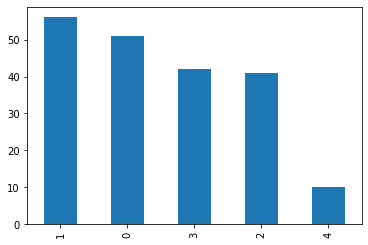

In [26]:
#Plotting the Target column 'num'  :- (1,2,3,4) denotes Disease present and 0 Denotes no Heart Disease
df.num.value_counts().plot(kind = 'bar')

In [27]:
df.num.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

We can convert this into a Binary classification Problem since 2,3,4 has less data:
    1. 0 -- No Heart Disease and
    2. 1 -- Heart Disease (1,2,3,4)

In [28]:
Target = []
for i in df.num.values:
    if i == 0:
        k = 0
    else:
        k = 1
    Target.append(k)

In [29]:
df['Target'] = Target # Creating a New column Target containing 0 and 1

In [41]:
df_dropped['Target'] = Target

In [30]:
df.Target.value_counts()  # We can tackle this unbalanced data by Oversampling before Model-Building  

1    149
0     51
Name: Target, dtype: int64

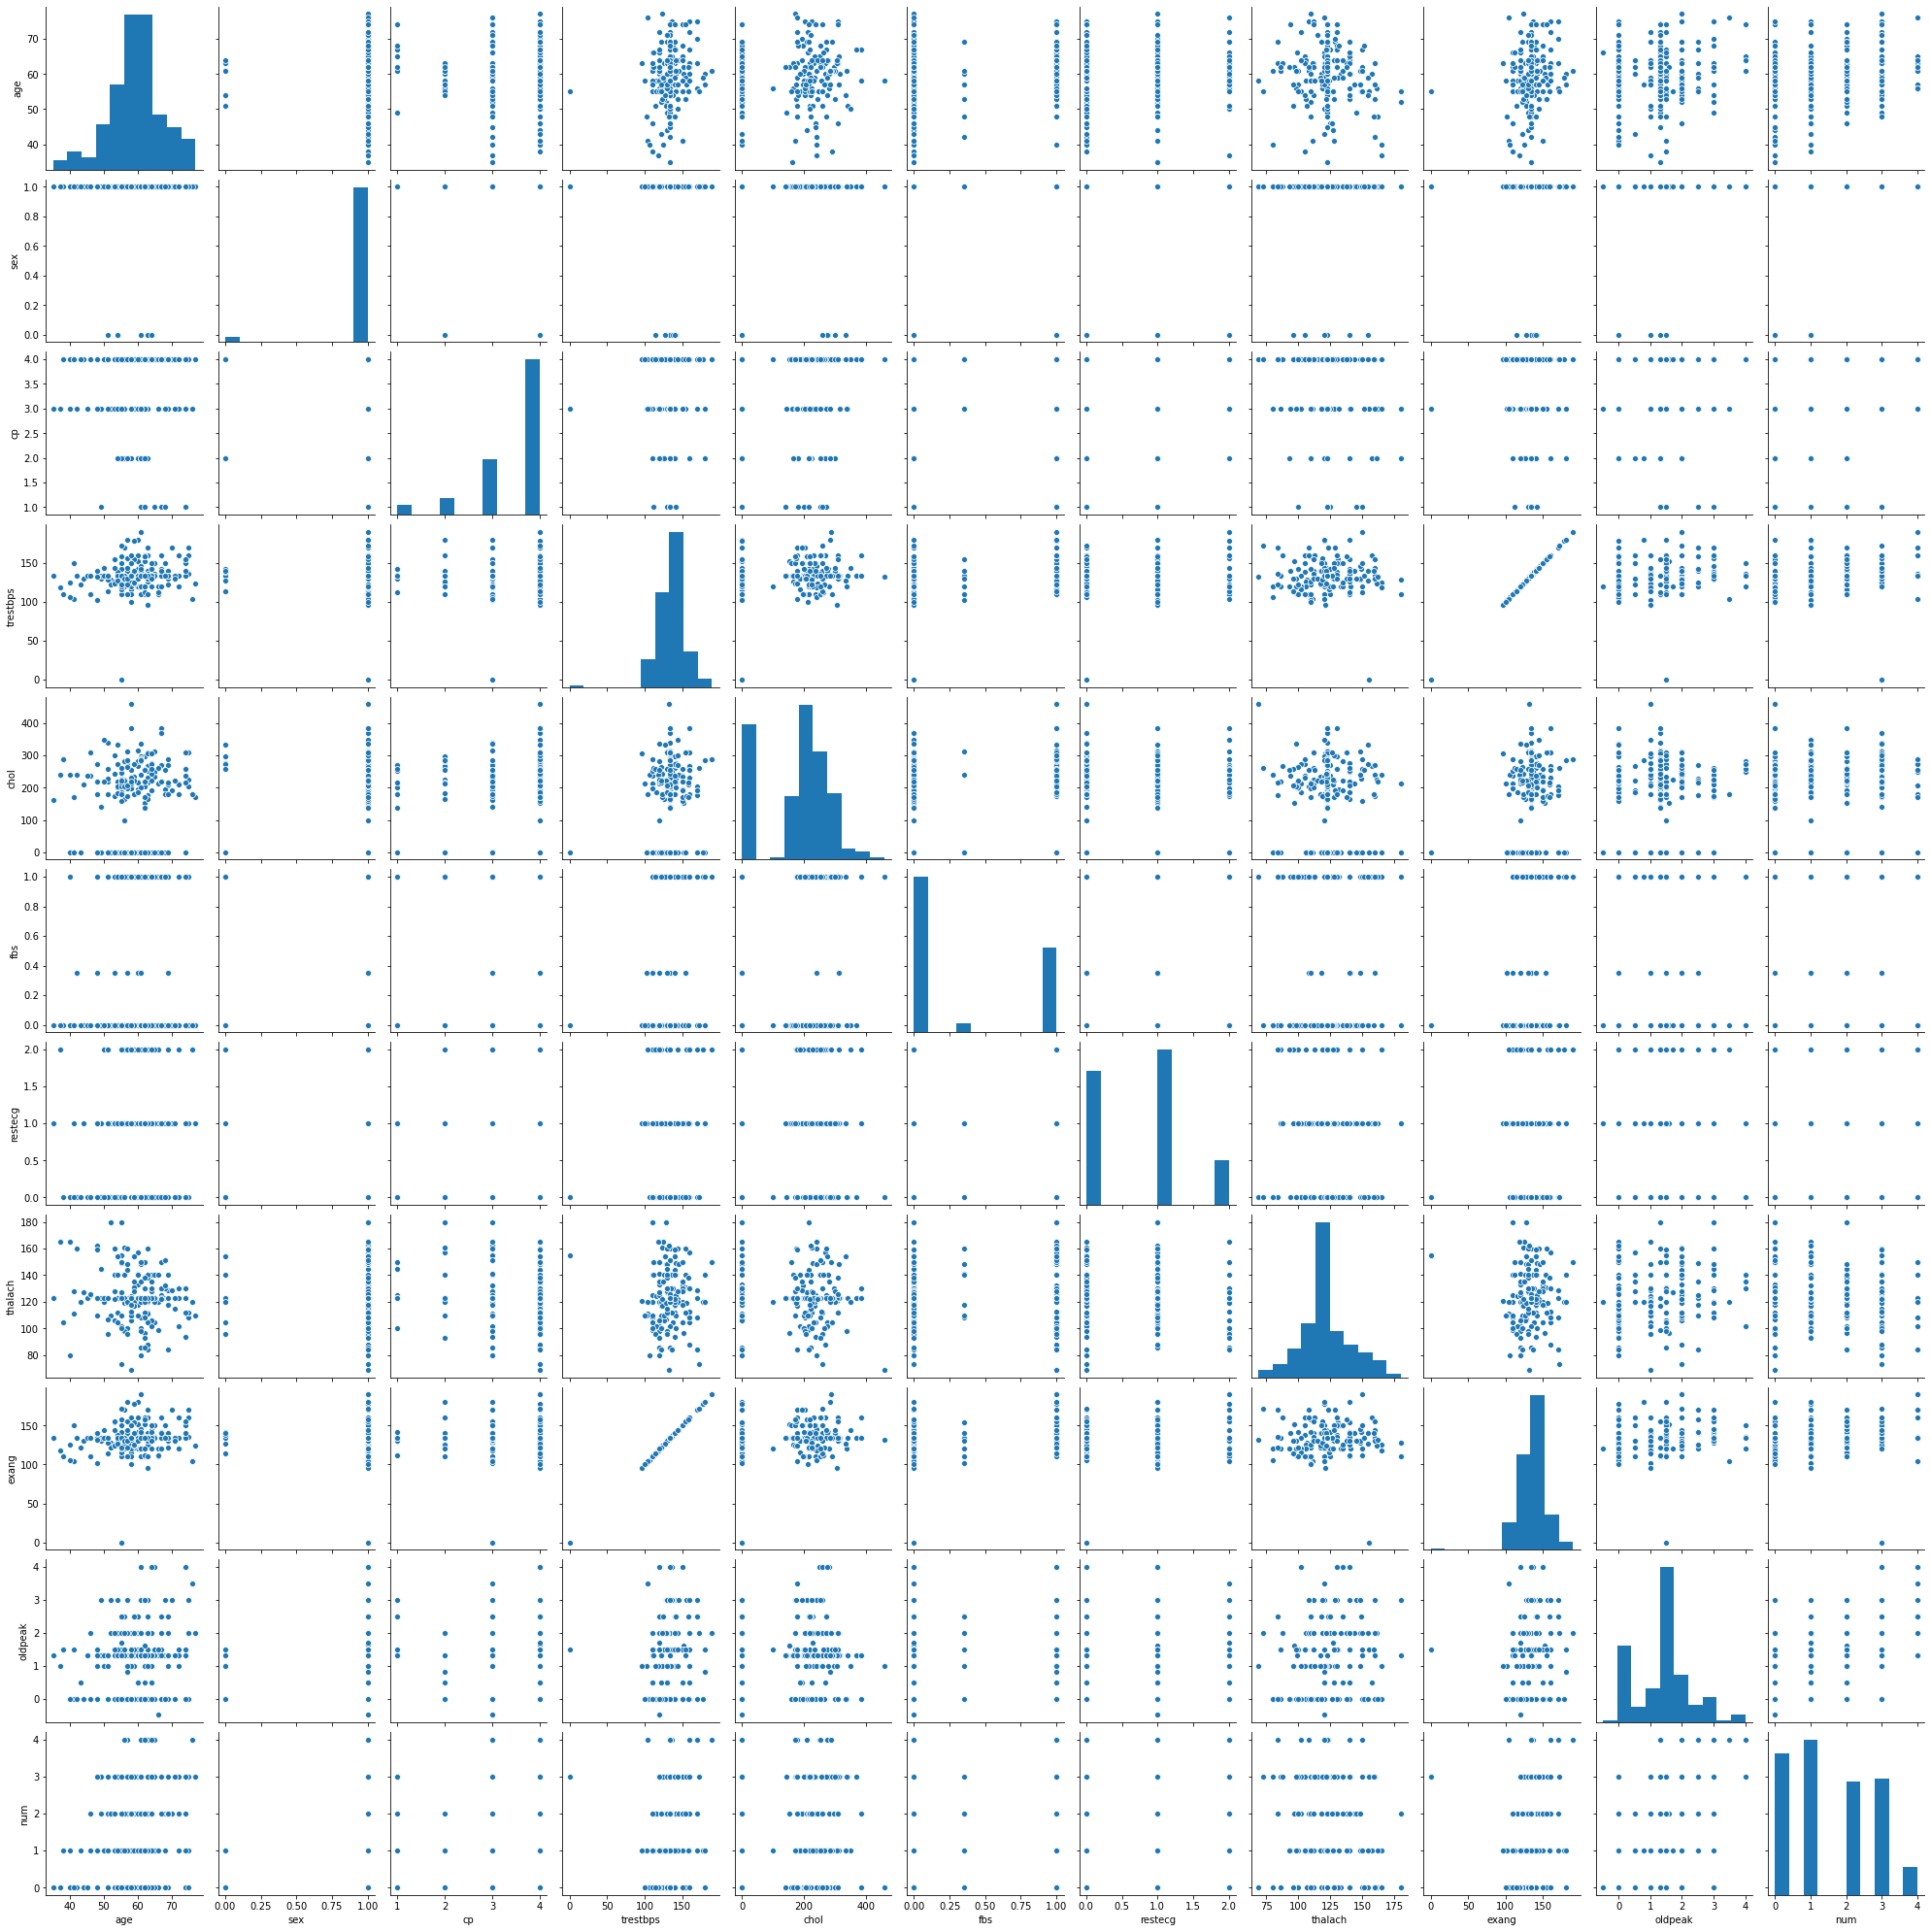

In [31]:
# Plotting the relation between all the Variables Pair-wise
sns.pairplot(df_dropped)

Here we can observe 'exang' and 'trestbps' has linear relationship:
        
        trestbps: resting blood pressure (in mm Hg on admission to the hospital)
        exang: exercise induced angina

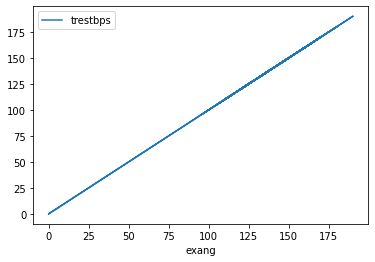

In [32]:
# plotting them separately
df.plot(x = 'exang', y = 'trestbps')

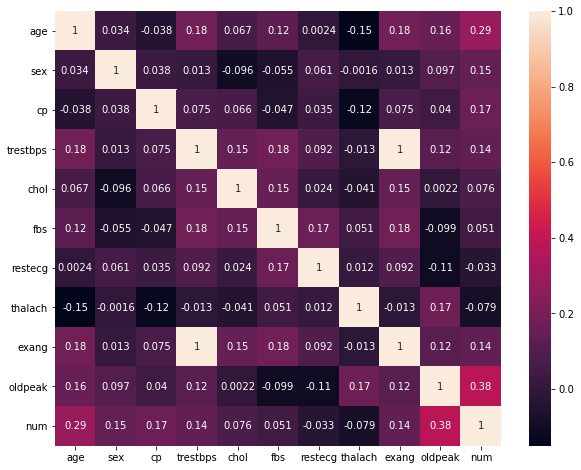

In [33]:
#finding the correlation between variables using heat map.
ax,fig = plt.subplots(figsize=(10,8))
df_corr = df_dropped.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

There is very low co-relation among the variables with the target variable

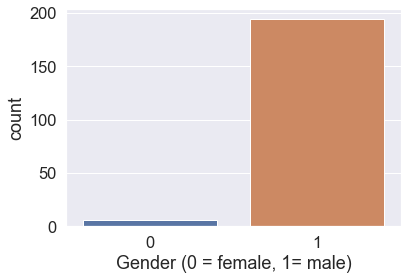

In [34]:
#Male and Female Distribution in the Dataset
sns.set(font_scale=1.5) 
sns.countplot(x='sex', data=df)
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

The Dataset has large number of Male Sample but very few Female sample data

Text(0.5, 0, 'Heart Disease Status (0 means no Disease)')

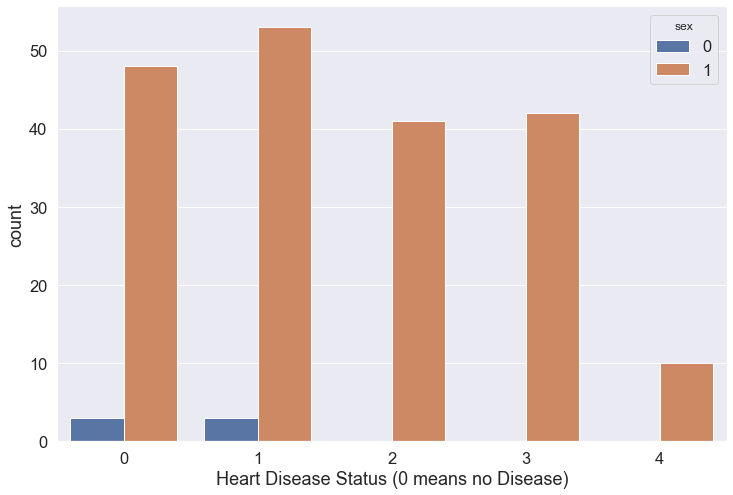

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='num',hue='sex',data=df)
plt.xlabel("Heart Disease Status (0 means no Disease)")

There is no data for females in Heart disease category 2,3,4

Text(0.5, 0, 'Heart Disease -- Yes(1) or No(0)')

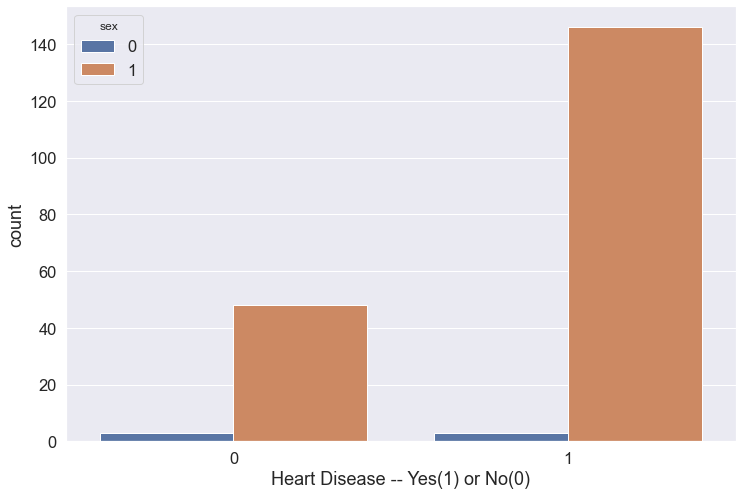

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='Target',hue='sex',data=df)
plt.xlabel("Heart Disease -- Yes(1) or No(0)")

Text(0.5, 0, 'Age')

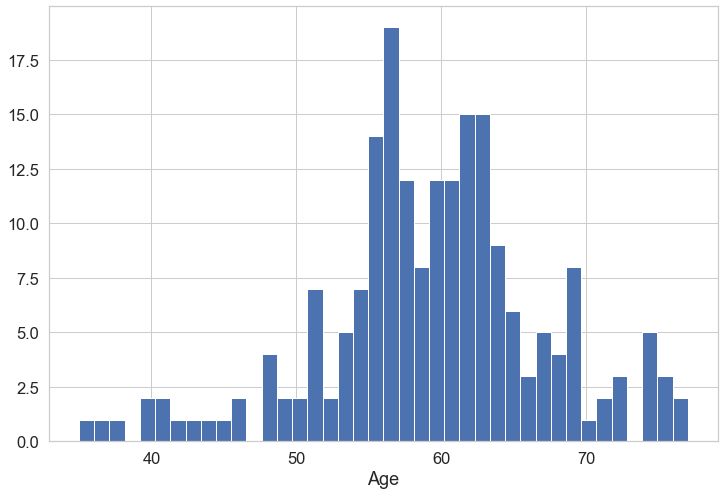

In [37]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
df['age'].hist(bins=40)
plt.xlabel('Age')

Most of the people in the Dataset are in the age-group 55 to 65 years 

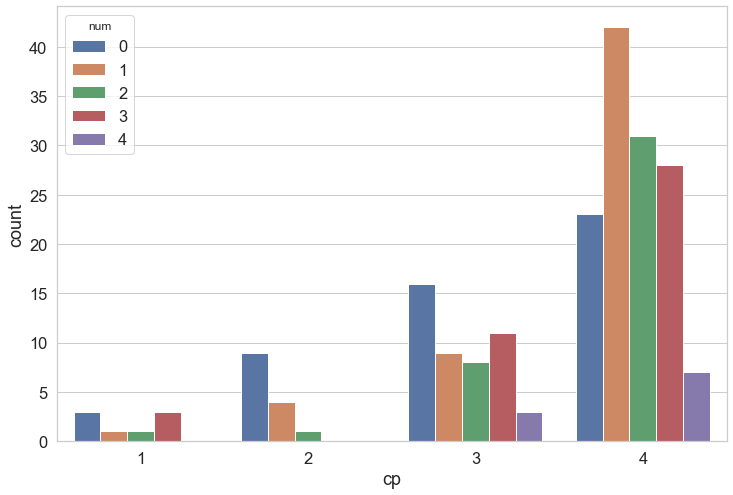

In [38]:
# cp: Chest Pain Type vs num: Disease Status (0,1,2,3,4)
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='num',data=df)

From the Data it can be observed that chest pain category 4 has more chance of Heart disease since 'num' value = 0 is less compared to 1,2,3,4 in category 4 cp. 

### Classification Model

In [42]:
df_dropped.Target.value_counts()     #The dataset is Unbalanced

1    149
0     51
Name: Target, dtype: int64

In [43]:
149/51   # Target == 1 is 3 times more than Target == 0

2.9215686274509802

In [44]:
# Tackling Unbalanced Dataset by Oversampling
from sklearn.utils import shuffle
A= df_dropped[df_dropped['Target']==0]
B= df_dropped[df_dropped['Target']==1]
A_repeated = pd.concat([A]*3, ignore_index=True)
df_final = pd.concat([A_repeated,B])
df_final = shuffle(df_final)
df_final = df_final.reset_index(drop=True)

In [45]:
df_final.Target.value_counts()

0    153
1    149
Name: Target, dtype: int64

In [46]:
df_final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Target
0,61,1,3,120.000000,337.0,0.0,0,98.000000,120.000000,0.000000,3,1
1,69,1,3,133.763889,271.0,0.0,2,122.795918,133.763889,1.320833,0,0
2,61,1,2,133.763889,283.0,0.0,0,122.795918,133.763889,1.320833,0,0
3,62,1,3,133.763889,0.0,1.0,1,122.795918,133.763889,1.320833,2,1
4,64,1,4,130.000000,223.0,0.0,1,128.000000,130.000000,0.500000,0,0


In [60]:
X = df_final.drop(['num','Target'],axis = 1).values    # Attributes

In [62]:
y = df_final['Target'].values     # The target variable

In [63]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [64]:
#Building Function for Model Testing
def classification_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

In [65]:
#List of Models to be tested
model_list = [KMeans(),LogisticRegression(),SVC(),RandomForestClassifier()]

In [66]:
classification_function(model_list)

Model Name : KMeans()
accuracy_score:  0.14754098360655737


Model Name : LogisticRegression()
accuracy_score:  0.6557377049180327


Model Name : SVC()
accuracy_score:  0.6557377049180327


Model Name : RandomForestClassifier()
accuracy_score:  0.819672131147541




In [67]:
#Importing Minmax Scaler for Normalizing the data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [68]:
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Testing the models again after scaling
for model in model_list:
        model.fit(X_train_minmax,y_train)
        pred=model.predict(X_test_minmax)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

Model Name : KMeans()
accuracy_score:  0.06557377049180328


Model Name : LogisticRegression()
accuracy_score:  0.5573770491803278


Model Name : SVC()
accuracy_score:  0.6229508196721312


Model Name : RandomForestClassifier()
accuracy_score:  0.819672131147541




The Random Forest Classifier is the Best Model

In [69]:
randfor = RandomForestClassifier()

In [70]:
randfor.fit(X_train_minmax,y_train)

RandomForestClassifier()

In [71]:
predictions = randfor.predict(X_test_minmax)

In [72]:
print("accuracy_score: ",accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

accuracy_score:  0.8360655737704918
[[31  3]
 [ 7 20]]


In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        34
           1       0.87      0.74      0.80        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [74]:
#Saving the Best Model
import joblib
# Saving the model as a pickle in a file
joblib.dump(randfor,"Heart_diseases_classification.pkl")

['Heart_diseases_classification.pkl']